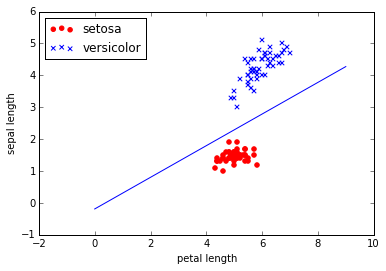

In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
import random

class Perceptron(object):
    def __init__(self, learning_rate, iter_times):
        self.learning_rate = learning_rate
        self.iter_times = iter_times

    def fit(self, X, y):
        num_features = X.shape[1]
        self.w_ = np.array([random.random() for _ in range(num_features + 1)])

        # Train for self.iter_times
        self.errors_ = []
        for _ in xrange(self.iter_times):
            error = 0
            for xi, target in zip(X, y):
                if target - self.predict(xi) != 0:
                    error += 1
            self.errors_.append(error)
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
        return self


    def net_input(self, xi):
        return np.dot(xi, self.w_[1:]) + self.w_[0]

    def predict(self, xi):
        return np.where(self.net_input(xi) >= 0, 1, -1)

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values


import matplotlib.pyplot as plt
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')


ppn = Perceptron(learning_rate=0.1, iter_times=10)
ppn.fit(X, y)

x1_new = range(10)
x2_new = [(-ppn.w_[0]-ppn.w_[1]*x1)/ppn.w_[2] for x1 in x1_new]
plt.plot(x1_new, x2_new)

plt.show()

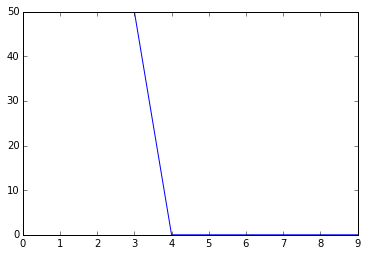

In [54]:
plt.plot(ppn.errors_)
plt.show()